In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

# Enfoque discriminativo

Estamos interesandos en problemas de clasificación en el que queremos aprender a asignar una clase $\mathcal{C}_{k}$ a un dato $x$ teniendo como datos de entrenamiento un conjunto etiquetado $x_{\text{train}},t_{\text{train}}$

La clase pasada vimos el **Perceptron**. Este clasificador nos provee una **función discriminante** $y(x,w)$ que separa a las clases. Es decir, $y$ tiene incluida una decisión sobre la clase a la que pertenece $x$.

Hoy vamos a ver un enfoque **discriminativo**. Nuestro modelo busca aprender

$$p(\mathcal{C}_{k}|x)$$

En este enfoque no intentamos modelar priors, verosimilitud y evidencia. Nos concentramos directamente en el **posterior**. Ahora, nuestra función $y(x,w)$ decide automaticamente la clase a la que pertenece $x$. Con el posterior a mano, tenemos que implementar la **teoría de la decisión** para asignar un valor de $t$.

Para el problema binario, sólo necesitamos modelar $p(\mathcal{C}_{1}|x)$ ya que $p(\mathcal{C}_{2}|x)=1-p(\mathcal{C}_{1}|x)$. Para el problema multiclase, si necesitamos modelar las $K$ distribuciones posteriores.

## La función sigmoide

Para el caso binario, podemos hacer la siguiente cuenta

$$p(\mathcal{C}_{1}|x)=\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})+p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\frac{1}{1+\frac{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}}$$

Si tomamos $a=\text{Ln }\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}$

$$p(\mathcal{C}_{1}|x)=\frac{1}{1+\text{e}^{-a}}=\sigma(a)$$

$\sigma(a)$ es la **función sigmoide**.

Si inspeccionamos $a$ un poco mas, vemos que 

$$a=\text{Ln }\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\text{Ln }\frac{p(\mathcal{C}_{1}|x)}{p(\mathcal{C}_{2}|x)}$$

es el logaritmo del cociente entre probabilidades. Entonces, utilizando la sigmoide, podemos prescindir de la verosimilitud y del prior, considerando unicamente los posteriores.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Log odds')

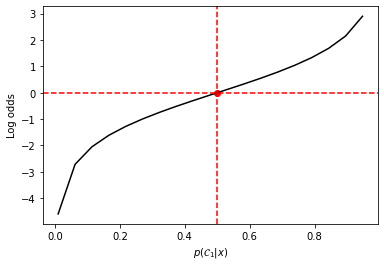

In [2]:
prob_vals=np.linspace(0.01,1.0,20)

a_vals=list(map(lambda prob: np.log(prob/(1-prob)),prob_vals))

plt.plot(prob_vals,a_vals,color='black')
plt.scatter(0.5,0.0,color='red')
plt.axvline(0.5,linestyle="dashed",color='red')
plt.axhline(0.0,linestyle="dashed",color='red')
plt.xlabel(r'$p(\mathcal{C}_{1}|x)$')
plt.ylabel('Log odds')

Vemos que el cociente de probabilidades toma valores entre $-\infty$ y $\infty$. Sin embargo, la función sigmoide tiene que dar un valor entre 0 y 1 ya que da el valor de una probabilidad.

Text(0, 0.5, '$\\sigma$')

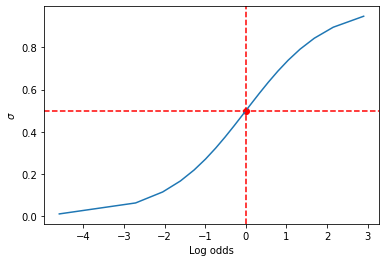

In [3]:
from scipy.special import expit
plt.plot(a_vals,expit(a_vals))
plt.scatter(0.0,expit(0.0),color='red')
plt.axvline(x=0.0,linestyle="dashed",color='red')
plt.axhline(y=0.5,linestyle="dashed",color='red')
plt.xlabel('Log odds')
plt.ylabel(r'$\sigma$')

In [4]:
np.allclose(expit(a_vals),prob_vals)

True

En particular, cuando el cociente de probabilidades da uno, la sigmoide da 0.5 (como tiene que dar!).

La sigmoide tiene dos propiedades que nos vienen barbaro:

$$\sigma(-a)=1-\sigma(a)$$

y

$$\frac{d\sigma}{da}=\sigma(1-\sigma)$$

Para el caso de K clases, consideramos la siguiente generalización

$$p(\mathcal{C}_{k}|x)=\frac{p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})}{\sum_{l=1}^{K}p(x|\mathcal{C}_{l})p(\mathcal{C}_{l})}=\frac{e^{a_{k}}}{\sum_{l=1}^{K}e^{a_{l}}}$$

con $a_{k}=\text{Ln }p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})$

Esta función se conoce como la exponencial normalizada o **softmax**.

## Regresión Logística

Vamos a considerar ahora la **Regresión Logística**. Para dos clases, modelamos el posterior como

$$p(\mathcal{C}_{1}|\vec{x})=y(\vec{x},\vec{w})=\sigma(\vec{w}^{T}\vec{\phi}(\vec{x}))$$

Fijense como, al igual que para el Perceptron, introducimos una función de activación no lineal. Sin embargo, esta función de activación es distinta y garantiza que obtengamos un número entre 0 y 1, tal como debe ser una probabilidad. Que utilicemos la sigmoide para lograrlo esta motivado en el truco que vimos en la sección anterior pero es ahora una elección de modelado, no un resultado de hacer inferencia.

Acá $\vec{\phi}$ vuelve a incluir $\phi_{0}(\vec{x})=1$.

Para muchos datos, agrupo

$$\Phi=\begin{pmatrix}\vec{\phi}^{T}(\vec{x}_{1}) \\ ... \\ \vec{\phi}^{T}(\vec{x}_{N})\end{pmatrix}$$

$\sigma(\Phi\cdot \vec{w}) = \begin{pmatrix}\sigma(\vec{\phi}^{T}(\vec{x}_{1}) \cdot\vec{w})\\ ... \\ \sigma(\vec{\phi}^{T}(\vec{x}_{N})\cdot\vec{w})\end{pmatrix}=\begin{pmatrix}\sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{1}))^T)\\ ... \\ \sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{N}))^T)\end{pmatrix}=\begin{pmatrix}y(\vec{x}_{1},\vec{w})\\ ... \\ y(\vec{x}_{N},\vec{w})\end{pmatrix}$

## ¿Que falta especificar?

Necesitamos decidir la función de error adecuada para el problema y definir un algoritmo para minimizar dicha función.

Podemos encontrarla como hicimos para fundamentar cuadrados mínimos: escribiendo la verosimilitud.

$t$ es una variable binaria, con valores exito o fracaso. 
Para una única medición, la verosimilitud $p(\text{t}|\vec{x},\vec{w})$ es entonces una Bernoulli $p(t|\mu)=\mu^{t}(1-\mu)^{1-t}$ con $\mu$ la probabilidad de éxito. ¿Cuál es dicha probabilidad de éxito? Justamente es lo que queremos obtener, $p(\mathcal{C}_{1}|\vec{x})=y(\vec{x},\vec{w})$.

Entonces para un dataset $\vec{x}_{n}$, con $n=1,..,N$ la verosimilitud es

$p(\text{T}|X,\vec{w})=\prod_{n=1}^{N}y^{t_n}_{n}(1-y_{n})^{1-t_n}$

donde $y_{n}=y(x_{n},\vec{w})$. Tomando el el logaritmo

$\text{Ln }p(\text{T}|\vec{w})=\sum_{n=1}^{N}(t_{n}\text{Ln }y_{n}+(1-t_{n})\text{Ln }(1-y_{n}))$

Aplicando un signo menos, llegamos a la función de error que nos interesa, y que vamos a usar muchisimo: la entropía cruzada o **cross-entropy**

$$E(\vec{w})=-\sum_{n=1}^{N}(t_{n}\text{ln}y_{n}+(1-t_{n})\text{ln}(1-y_{n}))$$



Dado que $t_{n}=\{0,1\}$, la función de error hace lo siguiente

Si $t_{n}=1$, tiene en cuenta $\text{Ln }y_{n}$. Entonces, $y_{n}$ tiene que ser cercano a 1 para minimizar el error.

Si $t_{n}=0$, tiene en cuenta $\text{Ln }1-y_{n}$. Entonces, $y_{n}$ tiene que ser cercano a 0 para minimizar el error.

Es decir, hace lo que tiene que hacer. Recordemos que $y_{n}$ no es $t_{n}$ sino que es $p(t_{n}|\vec{x}_{n},\vec{w})$.

Minimizar esta función de error es más díficil que minimizar la de cuadrados mínimos debido a la presencia de los logaritmos. Sin embargo, podemos definir un algoritmo iterativo para encontrar los $\vec{w}$, el Iterative Reweighted Least Squares o IRLS. Este algoritmo utiliza una actualización de Newton-Ralphson:

$\vec{w}^{\text{nuevo}}=\vec{w}^{\text{viejo}}-\text{H}^{-1}\nabla E(\vec{w})$

Donde $\nabla E(\vec{w})$ es el gradiente del error y $\text{H}$ es la matriz Hessiana. Para la regresión logística, uno puede llegar a sus propias ecuaciones normales _iterativas_ aprovechando las propiedades de la sigmoide

$\vec{w}^{\text{nuevo}}=(\text{$\Phi$}^{T}\text{R}\text{$\Phi$})^{-1}\text{$\Phi$}^{T}\text{R}\text{z}$

Con $\Phi$ la matriz de diseño, $\text{R}$ la matriz diagonal cuyos elementos son $y_{n}(1-y_{n})$ y $\text{z}$ es un vector que se calcula como:

$\text{z}=\text{$\Phi$}\vec{w}^{\text{viejo}}-\text{R}^{-1}(\text{Y}-\text{T})$

Con $\text{Y}$ e $\text{T}$ los vectores de predicciones y respuestas respectivamente. Noten que los pesos entran varias veces: en la matriz $\text{R}$, en el vector $\text{Y}$ y explicitamente en $\text{z}$. Es por esto que es iterativo.


Este algoritmo también puede aplicarse al caso de regresión lineal, viendo que el algoritmo de Newton-Raphson converge a la solución cerrada en 1 paso. La diferencia acá es la función de activación sigmoide. Además, quiero enfatizar que este algoritmo es iterativo pero no es secuencial, ya que utiliza todos los datos del dataset.

## Asignando clases

Como mencionamos la clase pasada, y vamos a ver en detalle la clase que viene, necesitamos decidir cuando asignar una medición a una clase.

Para el caso binario, podemos tomar el criterio que $x\in\mathcal{C}_1$ si

$$p(\mathcal{C}_{1}|x)\geq p(\mathcal{C}_{2}|x)$$

Dado que tenemos probabilidades que suman uno, este criterio pone la **frontera de decisión** en

$$p(\mathcal{C}_{1}|x)=0.5$$

Puede mostrarse que esta elección de frontera de decisión maximiza la **exactitud** o **accuracy**

$$\text{Exactitud = }\frac{\text{VP}+\text{VN}}{\text{VP}+\text{FP}+\text{VN}+\text{FN}}$$

Es decir, minimizamos la cantidad de **errores totales** (que no es lo mismo que minimizar la entropía cruzada).



## Ejercicio:

Para los datos de la clase pasada:

In [96]:
size1 = 250
mu1 = [0, 0]
cov1 = [[1, 0.95],[0.95, 1]]

size2 = 200
mu2 = [-3, 0.5]
cov2 = [[1, 0.8],[0.8, 1]]

np.random.seed(20200922)
# Sample classes
xc1 = multivariate_normal(mean=mu1, cov=cov1).rvs(size=size1).T
xc2 = multivariate_normal(mean=mu2, cov=cov2).rvs(size=size2).T

print(xc1.shape, xc2.shape)

(2, 250) (2, 200)


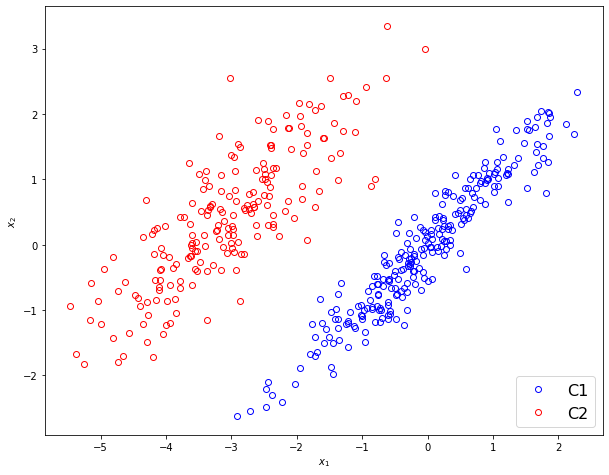

In [97]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

In [98]:
X = np.hstack([xc1, xc2]).T

tc1 = np.ones(xc1.shape[1])
tc2 = np.zeros(xc2.shape[1])

t = np.concatenate([tc1, tc2]).reshape(-1,1)

Utilizemos las funciones de base $\{1,x_1,x_2\}$ y obtengamos los coeficientes del Regresor Logístico complentando el siguiente código:

In [99]:
Phi=np.hstack([np.ones(len(X)).reshape(-1,1),X])# matriz de diseño
#print(Phi.shape)
w=[np.ones(3).reshape(-1,1)]#inicializo los pesos
n_iter = 13 #defino el numero de iteraciones con el que voy a jugar
for i in range(n_iter):
  y = expit(np.dot(Phi,w[-1]))# obtengo los ys iniciales utilizando mis pesos, la matriz de diseño y la funcion de activacion
  #print(y.shape)
  #R=np.diag(list(map(lambda yy: yy*(1-yy), y[:,0])))#matriz R
  R=np.diag(y[:,0]*(1-y[:,0]))#matriz R
  #print(R.shape)
  aux_matrix=np.linalg.solve(R,(y-t)) #paso auxiliar necesario
  z = np.dot(Phi,w[-1])-aux_matrix #matriz z
  aux_matrix_2 = np.dot(np.dot(Phi.T,R),Phi)
  aux_matrix_3 = np.dot(np.dot(Phi.T,R),z)
  w_aux=np.linalg.solve(aux_matrix_2,aux_matrix_3)
  if(1==1):#criterio de convergencia
    w.append(w_aux)
  else:
    break

Veamos como evolucionan los coeficientes

In [16]:
for w_val in w:
  print(w_val[:,0])

[1. 1. 1.]
[ 2.4404682   1.26402509 -1.91375055]
[ 3.45644332  1.96420953 -2.39061501]
[ 4.46892371  2.6750064  -3.00473299]
[ 5.50669428  3.44641528 -3.73743344]
[ 6.61784433  4.32475323 -4.6323189 ]
[ 7.88477088  5.36036928 -5.7345491 ]
[ 9.37809813  6.57649456 -7.04746665]
[11.11205601  7.95937618 -8.54144841]
[ 13.0623738    9.48246387 -10.18259107]
[ 15.18849171  11.11782682 -11.93793296]
[ 17.44722581  12.83904863 -13.7777448 ]
[ 19.80222713  14.62424842 -15.67896909]
[ 22.22681816  16.4571953  -17.6254591 ]


Utilizando los coeficientes finales, calculemos la exactitud

In [126]:
W=w[-1]
y = expit(np.dot(Phi,W))
y_pred=np.where(y>=0.5,1,0)

In [127]:
VP=np.sum(t[np.where(y_pred[:,0]==1),0])
FP=np.sum(1-t[np.where(y_pred[:,0]==1),0])
VN=np.sum(1-t[np.where(y_pred[:,0]==0),0])
FN=np.sum(t[np.where(y_pred[:,0]==0),0])
print(VP,FP,VN,FN)
print((VP+VN)/(VP+FP+VN+FN))

250.0 0.0 200.0 0.0
1.0


Por supuesto, `sklearn` nos hace la vida ligeramente más fácil...

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score?

In [28]:
print(accuracy_score(t,y_pred))

1.0


Otra herramienta invaluable, y que vamos a explorar la clase que viene, es la matriz de confusión. Esta matriz tiene como elemento i-j la cantidad de elementos de la clase i asignados al grupo j.

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix?

In [37]:
cf=confusion_matrix(t,y_pred)
print(cf)
#  pred0 pred1
#verdad0  VN  FP
#verdad1  FN  VP

[[200   0]
 [  0 250]]


Podemos sacar los elementos como:


In [38]:
VN,FP,FN,VP = cf.ravel() 
print(VP,FP,VN,FN)

250 0 200 0


Y grafiquemos el resultado junto con la frontera de decisión que maximiza la exactitud

In [51]:
x1=np.linspace(-6.0,3.0,3)
x2=np.linspace(-3.0,4.0,2)
X1toplot,X2toplot=np.meshgrid(x1,x2)
#print(x1,x2)
print(X1toplot)
print(X2toplot)
#print(np.c_[X1toplot.ravel(), X2toplot.ravel()])

[[-6.  -1.5  3. ]
 [-6.  -1.5  3. ]]
[[-3. -3. -3.]
 [ 4.  4.  4.]]


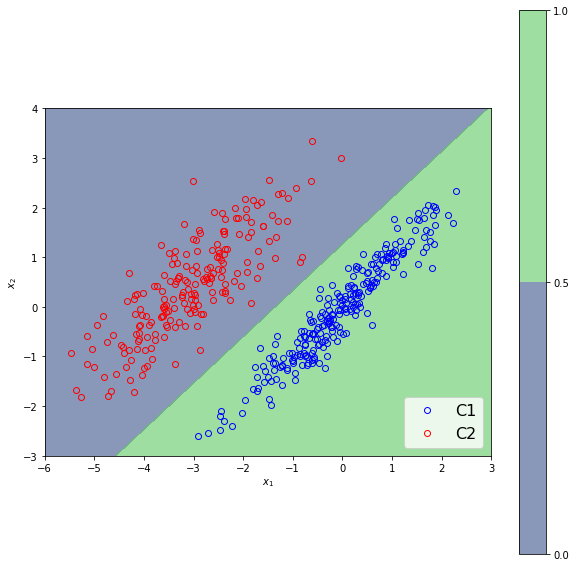

In [123]:
x1=np.linspace(-6.0,3.0,100)
x2=np.linspace(-3.0,4.0,100)
#X1toplot,X2toplot=np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
#Z=(np.asarray([expit(np.dot(W.T,[1.0,el[0],el[1]])) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)

Z = np.zeros((len(x2),len(x1)))
for x2_ind, x2_val in enumerate(x2):
  for x1_ind, x1_val in enumerate(x1):
    Z[x2_ind,x1_ind]=expit(np.dot(W.T,[1.0,x1_val,x2_val]))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(x1,x2,Z,levels=[0.0,0.5,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

En este codigo, podemos agregar más valores a los níveles del gráfico para tener una idea de la forma del posterior.

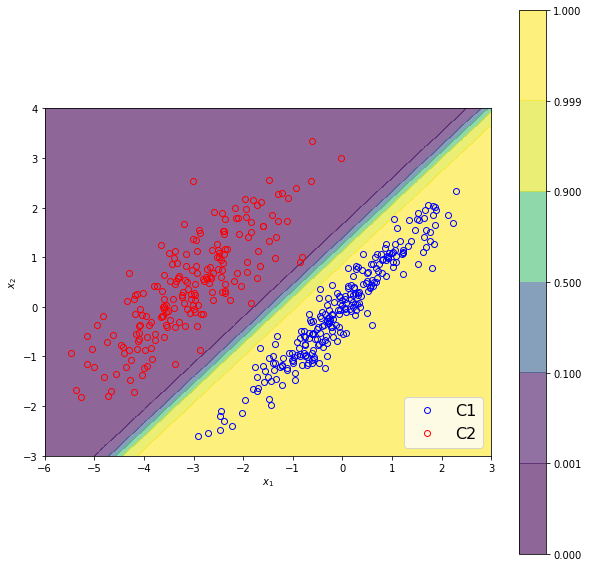

In [50]:
x1=np.linspace(-6.0,3.0,100)
x2=np.linspace(-3.0,4.0,100)
X1toplot,X2toplot=np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
Z=(np.asarray([expit(np.dot(W.T,[1.0,el[0],el[1]])) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(X1toplot,X2toplot,Z,levels=[0.0,0.001,0.1,0.5,0.9,0.999,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

Funciona perfecto! Veamos la implementación en `sklearn`:

In [103]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='none',fit_intercept=False,tol=0.00000000001)
lr.fit(Phi,t.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=1e-11, verbose=0,
                   warm_start=False)

In [104]:
lr.coef_

array([[ 61.12673668,  44.71826849, -48.64892232]])

In [105]:
W

array([[ 22.22681816],
       [ 16.4571953 ],
       [-17.6254591 ]])

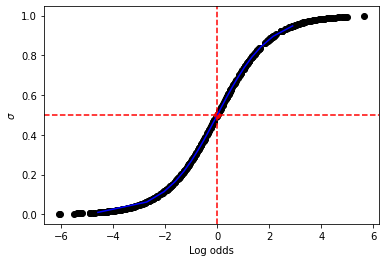

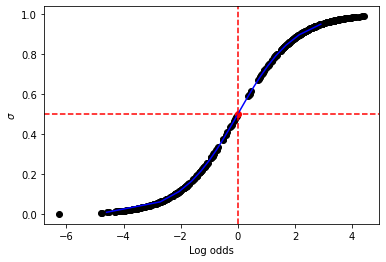

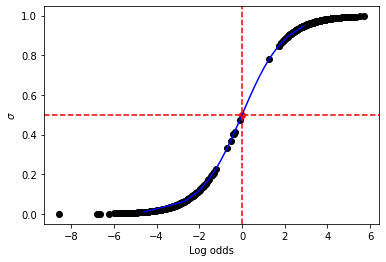

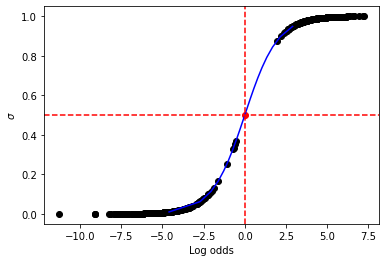

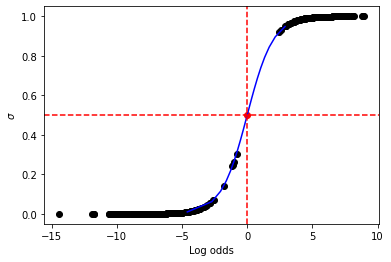

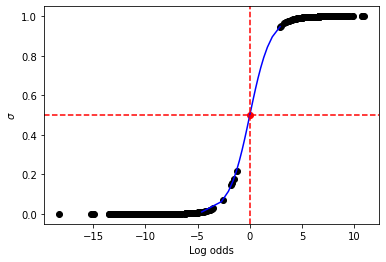

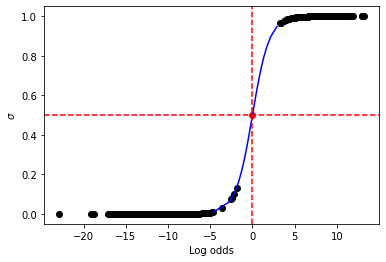

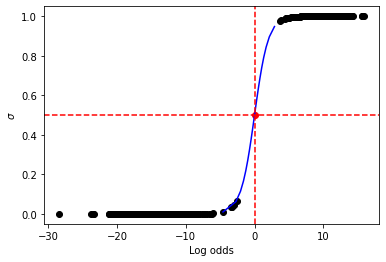

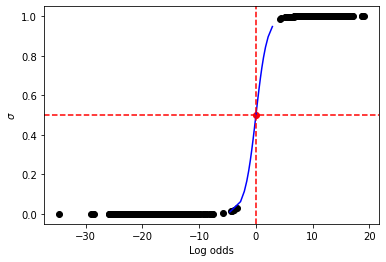

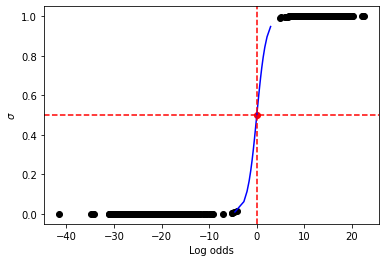

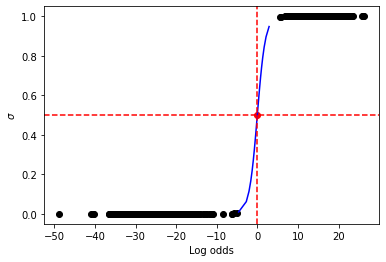

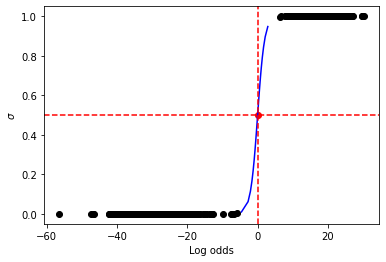

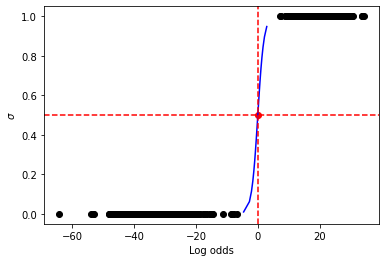

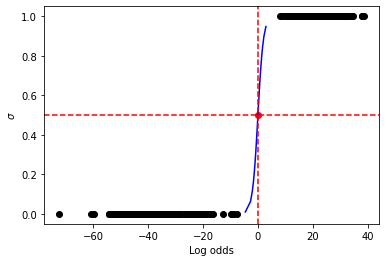

In [114]:
for w_val in w:
  #lr=LogisticRegression(penalty='none',fit_intercept=False,tol=tol)
  #lr.fit(Phi,t.ravel())
  #coefs=lr.coef_[0]
  plt.plot(a_vals,expit(a_vals),color='blue')
  plt.scatter(np.dot(Phi,w_val),expit(np.dot(Phi,w_val)),color='black')
  plt.scatter(0.0,expit(0.0),color='red')
  plt.axvline(x=0.0,linestyle="dashed",color='red')
  plt.axhline(y=0.5,linestyle="dashed",color='red')
  plt.xlabel('Log odds')
  plt.ylabel(r'$\sigma$')
  plt.show()

Dado que podemos, de ahora en mas vamos a usar por defecto la penalización `l2`

In [72]:
lr=LogisticRegression(penalty='l2',fit_intercept=False,C=1.0)
lr.fit(Phi,t.ravel())
print(lr.coef_)
print(accuracy_score(t.ravel(),lr.predict(Phi)))

[[ 3.94212356  2.77424688 -2.50078979]]
1.0


Este algoritmo viene con dos funciones muy útiles: ´predict_proba´ y `predict`. El primero devuelve el valor de la posterior para la clase éxito mientras que el segundo devuelve la asignación a una clase de acuerdo a cual probabilidad es mayor.

In [68]:
print(lr.predict_proba(Phi[0].reshape(1,-1)))
print(lr.predict(Phi[0].reshape(1,-1)))

[[0.00330056 0.99669944]]
[1.]


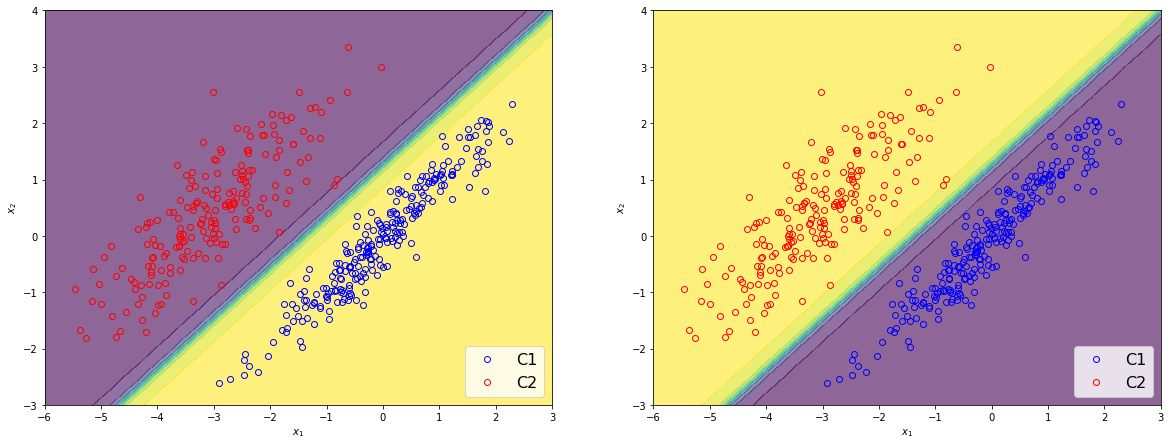

In [89]:
x1=np.linspace(-6.0,3.0,100)
x2=np.linspace(-3.0,4.0,100)
X1toplot,X2toplot=np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
Z1=(np.asarray([lr.predict_proba(np.asarray([1.0,el[0],el[1]]).reshape(1,-1))[0,1] for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)
0
Z2=(np.asarray([lr.predict_proba(np.asarray([1.0,el[0],el[1]]).reshape(1,-1))[0,0] for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)
0
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(X1toplot,X2toplot,Z1,levels=[0.0,0.001,0.1,0.3,0.5,0.7,0.9,0.999,1.0],alpha=0.6)
#plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')
ax = fig.add_subplot(122)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(X1toplot,X2toplot,Z2,levels=[0.0,0.001,0.1,0.3,0.5,0.7,0.9,0.999,1.0],alpha=0.6)
#plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

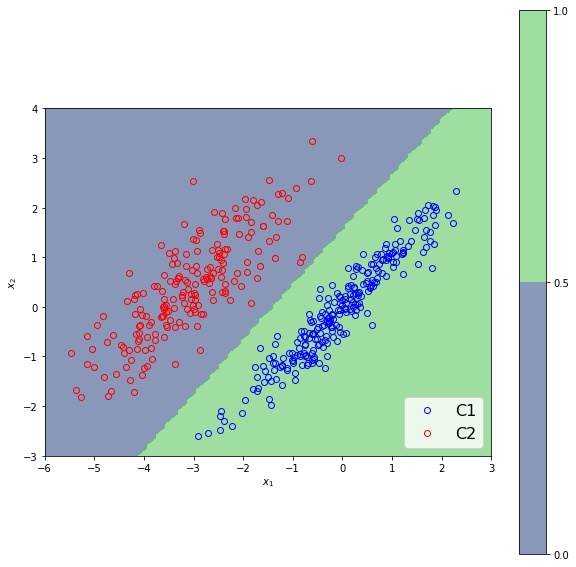

In [70]:
x1=np.linspace(-6.0,3.0,100)
x2=np.linspace(-3.0,4.0,100)
X1toplot,X2toplot=np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
Z=(np.asarray([lr.predict(np.asarray([1.0,el[0],el[1]]).reshape(1,-1)) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)
0
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(X1toplot,X2toplot,Z,levels=[0.0,0.5,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

## Sensibilidad a outliers

Al ser un modelo discriminativo, los outliers o anomalias son menos problematicas.

In [90]:
from sklearn.linear_model import Perceptron

Si no hay anomalias

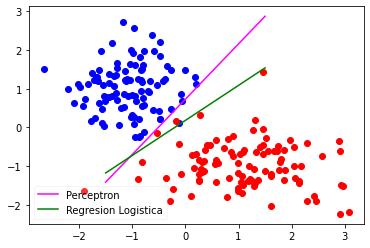

In [94]:
np.random.seed(42)
X1=multivariate_normal.rvs(size=100,mean=[-1.0,1.0],cov=[[0.4,0.0],[0.0, .4]])
X2=multivariate_normal.rvs(size=100,mean=[1.0,-1.0],cov=[[0.8,0.0],[0.0, .4]])
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
X=np.vstack((X1,X2))
t=np.vstack((np.ones(X1.shape[0]).reshape(-1,1),np.zeros(X2.shape[0]).reshape(-1,1))).ravel()
perceptron=Perceptron(fit_intercept=True,max_iter=100000000)
lr=LogisticRegression(fit_intercept=True)
perceptron.fit(X,t)
lr.fit(X,t)

intercept_perceptron=perceptron.intercept_
coeffs_perceptron=perceptron.coef_[0]

intercept_lr=lr.intercept_
coeffs_lr=lr.coef_[0]

x=np.linspace(-1.5,1.5,100)
y=np.linspace(-1.5,1.5,100)
# w0+w1*x1+w2*x2=0 en la frontera de decisión
# la frontera de decisión tiene por ecuación x2 = -(w0+w1*x1)/w2
perceptron_boundary=-(intercept_perceptron+coeffs_perceptron[0]*x)/coeffs_perceptron[1]
lr_boundary=-(intercept_lr+coeffs_lr[0]*x)/coeffs_lr[1]

plt.plot(x,perceptron_boundary,color='magenta',label='Perceptron')
plt.plot(x,lr_boundary,color='green',label='Regresion Logistica')
plt.legend(loc='lower left',framealpha=0.2)

Con anomalias:

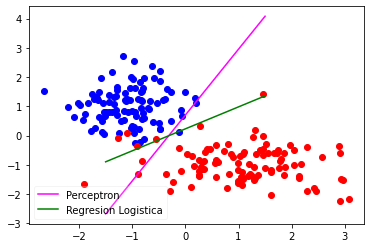

In [95]:
np.random.seed(42)
X1=multivariate_normal.rvs(size=100,mean=[-1.0,1.0],cov=[[0.4,0.0],[0.0, .4]])
aux1=multivariate_normal.rvs(size=95,mean=[1.0,-1.0],cov=[[0.8,0.0],[0.0, .4]])
aux2=multivariate_normal.rvs(size=5,mean=[-0.5,-0.5],cov=[[0.2,0.0],[0.0, 0.1]])
X2=np.zeros(X1.shape)
X2[:,0]=np.append(aux1[:,0],aux2[:,0])
X2[:,1]=np.append(aux1[:,1],aux2[:,1])
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
X=np.vstack((X1,X2))
t=np.vstack((np.ones(X1.shape[0]).reshape(-1,1),np.zeros(X2.shape[0]).reshape(-1,1))).ravel()
perceptron=Perceptron(max_iter=100000000)
lr=LogisticRegression()
perceptron.fit(X,t)
lr.fit(X,t)

intercept_perceptron=perceptron.intercept_
coeffs_perceptron=perceptron.coef_[0]

intercept_lr=lr.intercept_
coeffs_lr=lr.coef_[0]

x=np.linspace(-1.5,1.5,100)
y=np.linspace(-1.5,1.5,100)
lda_boundary=-(intercept_perceptron+coeffs_perceptron[0]*x)/coeffs_perceptron[1]
lr_boundary=-(intercept_lr+coeffs_lr[0]*x)/coeffs_lr[1]

plt.plot(x,lda_boundary,color='magenta',label='Perceptron')
plt.plot(x,lr_boundary,color='green',label='Regresion Logistica')
plt.legend(loc='lower left',framealpha=0.2)

Para aplicar estos conceptos e integrarlos a lo que venimos viendo desde el principio de la materia, consideremos el siguiente problema:

# Ejercicio largo

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = matplotlib.cm.get_cmap('Spectral')
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import confusion_matrix

Supongamos que estamos obsesionados con la NBA y queremos aplicar lo que venimos bien a las estadisticas de este noble deporte. Para eso, podemos obtener los datos de una página conocida como BasketballReference utilizando algunos paquetes útiles de Python

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.basketball-reference.com/leagues/NBA_{}_advanced.html".format(2016)# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)

In [ ]:
soup.findAll('tr', limit=2)# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis

In [ ]:
headers = headers[1:]
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
stats = pd.DataFrame(player_stats, columns = headers)
stats=stats.drop('\xa0',axis=1)

In [ ]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  578 non-null    object
 1   Pos     578 non-null    object
 2   Age     578 non-null    object
 3   Tm      578 non-null    object
 4   G       578 non-null    object
 5   MP      578 non-null    object
 6   PER     578 non-null    object
 7   TS%     578 non-null    object
 8   3PAr    578 non-null    object
 9   FTr     578 non-null    object
 10  ORB%    578 non-null    object
 11  DRB%    578 non-null    object
 12  TRB%    578 non-null    object
 13  AST%    578 non-null    object
 14  STL%    578 non-null    object
 15  BLK%    578 non-null    object
 16  TOV%    578 non-null    object
 17  USG%    578 non-null    object
 18  OWS     578 non-null    object
 19  DWS     578 non-null    object
 20  WS      578 non-null    object
 21  WS/48   578 non-null    object
 22  OBPM    578 non-null    ob

In [ ]:
stats.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Quincy Acy,PF,25,SAC,59,876,14.7,.629,.229,.318,8.1,15.1,11.6,4.4,1.6,2.2,10.0,13.1,1.8,0.7,2.5,.137,-0.2,0.2,-0.1,0.4
1,Jordan Adams,SG,21,MEM,2,15,17.3,.427,.167,.833,0.0,15.9,7.6,31.9,10.3,0.0,19.6,30.5,0.0,0.0,0.0,.015,-2.5,9.4,6.9,0.0
2,Steven Adams,C,22,OKC,80,2014,15.5,.621,.000,.460,12.5,16.1,14.4,4.3,1.0,3.3,14.1,12.6,4.2,2.3,6.5,.155,0.0,0.2,0.2,1.1
3,Arron Afflalo,SG,30,NYK,71,2371,10.9,.531,.298,.164,1.1,11.0,6.1,9.9,0.5,0.3,8.7,17.9,1.8,0.9,2.7,.055,-1.3,-1.6,-2.9,-0.5
4,Alexis Ajinça,C,27,NOP,59,861,13.8,.514,.003,.197,9.3,25.9,17.3,5.8,1.1,3.4,13.6,20.4,0.2,0.9,1.0,.058,-3.4,-0.6,-4.0,-0.4


Tenemos entonces una tabla con los jugadores que jugaron durante la temporada 2016 en la NBA.

Cuando uno trabaja con datos reales, suele tener que limpiarlos. Por ejemplo, acá ocurre que hay jugadores que jugaron para muchos equipos en una temporada. Esto se evidencia que tienen una entrada adicional que cuenta todos sus números bajo el equipo 'Tot'.

In [ ]:
stats[stats['Tm']=='TOT']['Player']

12       Chris Andersen
29        D.J. Augustin
73       Chase Budinger
93       Mario Chalmers
107        Bryce Cotton
117    Jared Cunningham
148         James Ennis
163          Randy Foye
166         Tim Frazier
169     Jimmer Fredette
172       Channing Frye
197         Erick Green
202          Jeff Green
207       P.J. Hairston
221       Tobias Harris
233        J.J. Hickson
241        Kirk Hinrich
246      Justin Holiday
249        Ryan Hollins
259      Kris Humphries
266      Ersan İlyasova
279        John Jenkins
282    Brandon Jennings
289         Joe Johnson
292     Orlando Johnson
313     Sean Kilpatrick
324           Ty Lawson
327        Courtney Lee
331           David Lee
347        Shelvin Mack
356        Kevin Martin
363        Ray McCallum
374        Jordan McRae
384        Andre Miller
398     Markieff Morris
418         Steve Novak
454        Phil Pressey
467       Brian Roberts
483      JaKarr Sampson
500           Ish Smith
505          Josh Smith
513    Lance Ste

Además, todo a partir de OWS son estadisticas que me hablan de "cuan bueno es un jugador", y estan obtenidas con ciertas combinaciones de las previas.

Ahora viene la definición del problema. Se les ocurren problemas interesantes de regresión y de clasificación?

Yo quiero saber cuan bien debe jugar un jugador para clasificar a la postemporada. Buscando un poco, los equipos posibles son:

In [ ]:
teams=stats['Tm'].unique()
teams

array(['SAC', 'MEM', 'OKC', 'NYK', 'NOP', 'LAC', 'SAS', 'POR', 'IND',
       'TOT', 'MIA', 'WAS', 'DAL', 'MIL', None, 'DET', 'ORL', 'HOU',
       'DEN', 'CHI', 'GSW', 'BRK', 'LAL', 'CHO', 'ATL', 'TOR', 'MIN',
       'PHO', 'UTA', 'BOS', 'PHI', 'CLE'], dtype=object)

Y viendo en wikipedia, los equipos pueden separarse en:

In [ ]:
no_playoff_west=np.asarray(['SAC','DEN','LAL','MIN','PHO','UTA','NOP'])
print(len(no_playoff_west))
playoff_west=np.asarray(['GSW','SAS','OKC','LAC','POR','DAL','MEM','HOU'])
print(len(playoff_west))

no_playoff_east=np.asarray(['CHI','WAS','ORL','MIL','NYK','BRK','PHI'])
print(len(no_playoff_east))
playoff_east=np.asarray(['CLE','TOR','MIA','ATL','BOS','CHO','IND','DET'])
print(len(playoff_east))

7
8
7
8


## Preprocesado

En principio, yo tengo mi dataframe y ahora lo unico que voy a hacer es separar en Train y Test y luego asignarles las clases. En particular, voy considerar jugadores que jugaron cierta cantidad de los partidos al menos cierta cantidad de minutos y que participaron mucho del partido.

In [ ]:
stats['Pos'].value_counts()

PG       129
PF       122
SG       116
SF       105
C        104
PF-C       1
SG-SF      1
Name: Pos, dtype: int64

In [ ]:
stats_now=stats.copy()
stats_now=stats_now[stats_now['Pos'].isin(['SG','PF','PG','C','SF'])]
stats_now["G"]=pd.to_numeric(stats_now["G"])
stats_now["MP"]=pd.to_numeric(stats_now["MP"])
stats_now["USG%"]=pd.to_numeric(stats_now["USG%"])
stats_now=stats_now[stats_now["USG%"]>stats_now["USG%"].mean()]
stats_now["MPperG"]=stats_now["MP"]/stats_now["G"]
stats_now=stats_now[stats_now["G"]>=20]
stats_now=stats_now[stats_now["MPperG"]>=25]
stats_now=stats_now[stats_now["Tm"]!="TOT"]

In [ ]:
stats_now=stats_now.replace(['PG','SG','SF','PF','C'],[1,2,3,4,5])
stats_now['Pos'].value_counts()

1    29
2    26
4    19
3    19
5    15
Name: Pos, dtype: int64

Generemos los labels. Vamos a aplicar el siguiente codigo:

0: no playoff oeste 1: playoff oeste 2: no playoff este 3: playoff este

0    30
2    28
3    26
1    24
Name: label, dtype: int64


(array([ 1.,  0.,  4.,  0., 10.,  0.,  7.,  0.,  7.,  1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

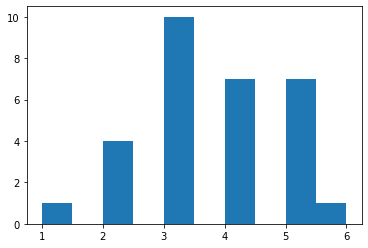

In [ ]:
stats_now['label']=stats_now["Tm"]
stats_now['label']=stats_now['label'].replace(no_playoff_west,0)
stats_now['label']=stats_now['label'].replace(playoff_west,1)
stats_now['label']=stats_now['label'].replace(no_playoff_east,2)
stats_now['label']=stats_now['label'].replace(playoff_east,3)
print(stats_now['label'].value_counts())
plt.hist(stats_now['Tm'].value_counts())

Bien, ahora definamos las caracteristicas que vamos a utilizar. Para visualizar facilmente vamos a elegir unicamente dos: PER y USG%. Guardamos ademas el nombre, la posicion y el label.

In [ ]:
stats_now=stats_now[['Player','Pos','PER','USG%','label']]
stats_now['PER']=pd.to_numeric(stats_now['PER'])
stats_now['USG%']=pd.to_numeric(stats_now['USG%'])

In [ ]:
print(stats_now.iloc[np.where(stats_now["Player"]=="LeBron James")])
print(stats_now.iloc[np.where(stats_now["Player"]=="Will Barton")])

           Player  Pos   PER  USG%  label
275  LeBron James    3  27.5  31.4      3
         Player  Pos   PER  USG%  label
40  Will Barton    2  16.0  23.0      0


Veamos si hay jugadores repetidos:

Tobias Harris        2
Jeff Green           2
Jonas Valančiūnas    1
Evan Fournier        1
DeMarcus Cousins     1
                    ..
Chris Bosh           1
Tyreke Evans         1
Marc Gasol           1
Jordan Clarkson      1
Alec Burks           1
Name: Player, Length: 106, dtype: int64


(array([104.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

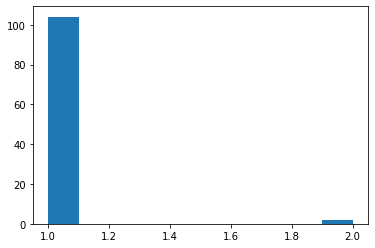

In [ ]:
print(stats_now['Player'].value_counts())
plt.hist(stats_now['Player'].value_counts())

Los hay pero son pocos por lo que no nos vamos a gastar en corregirlo.

Dividamos en train y test. Como cada posicion es un mundo, vamos a estratificar para que train y test tengan mismas proporciones de cada posición

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=445543)
for train_index, test_index in split.split(stats_now, stats_now["Pos"]):
    strat_train_set = stats_now.iloc[train_index]
    strat_test_set = stats_now.iloc[test_index]

In [ ]:
stats_train = strat_train_set.drop(["Player","Pos","label"], axis=1) # drop labels for training set
stats_train_labels = strat_train_set["label"].copy()
stats_test = strat_test_set.drop(["Player","Pos","label"], axis=1) # drop labels for training set
stats_test_labels = strat_test_set["label"].copy()

Veamos como se ven los datos

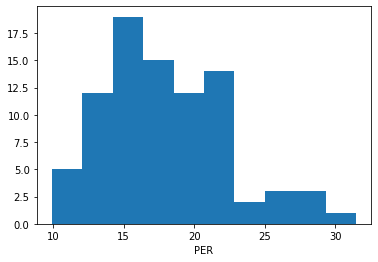

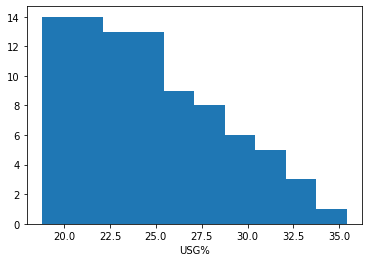

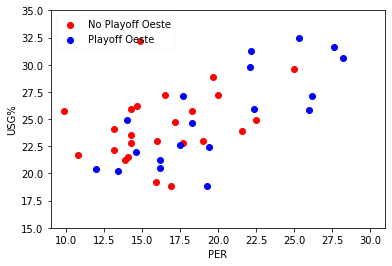

(15.0, 35.0)

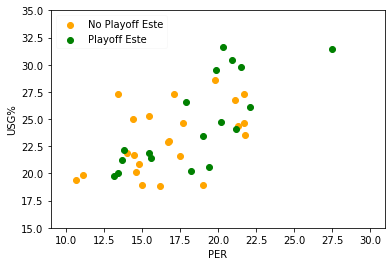

In [ ]:
plt.hist(stats_train['PER'],bins=10)
plt.xlabel(r'PER')
plt.show()
plt.hist(stats_train['USG%'],bins=10)
plt.xlabel(r'USG%')
plt.show()
plt.scatter(stats_train['PER'][stats_train_labels==0],stats_train['USG%'][stats_train_labels==0], c='red', label="No Playoff Oeste")
plt.scatter(stats_train['PER'][stats_train_labels==1],stats_train['USG%'][stats_train_labels==1], c='blue', label="Playoff Oeste")
plt.legend(loc='upper left',framealpha =0.1)
plt.xlim(9.0,31.0)
plt.ylim(15.0,35.0)
plt.xlabel(r'PER')
plt.ylabel('USG%')
plt.show()
plt.scatter(stats_train['PER'][stats_train_labels==2],stats_train['USG%'][stats_train_labels==2], c='orange', label="No Playoff Este")
plt.scatter(stats_train['PER'][stats_train_labels==3],stats_train['USG%'][stats_train_labels==3], c='green', label="Playoff Este")
plt.legend(loc='upper left',framealpha =0.1)
plt.xlabel(r'PER')
plt.ylabel('USG%')
plt.xlim(9.0,31.0)
plt.ylim(15.0,35.0)

Viendo los datos, que esperamos que pase con nuestro clasificador?

El ejercico es el siguiente:

Entrenen tanto un Perceptron como un Regresor Logistico para Este y para Oeste por separados. Para cada clasificador y cada conferencia obtengan la matriz de confusion, la exactitud e impriman dos figuras: en la primera grafiquen la función de decision / posterior utilizando los comandos `decision_function`/`predict_proba` y en la segunda grafiquen la frontera de decisión y las asignaciones utilizando el comando `predict`.

## Y si quiero mas inputs?

Bueno, en principio puedo elegir mas inputs

In [ ]:
stats_now=stats_now[['Player','Pos','PER','USG%','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','label']]
for e in ['PER','USG%','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%']:
  stats_now[e]=pd.to_numeric(stats_now[e])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=445543)
for train_index, test_index in split.split(stats_now, stats_now["Pos"]):
    strat_train_set = stats_now.iloc[train_index]
    strat_test_set = stats_now.iloc[test_index]

In [ ]:
stats_train = strat_train_set.drop(["Player","Pos","label"], axis=1) # drop labels for training set
stats_train_labels = strat_train_set["label"].copy()
stats_test = strat_test_set.drop(["Player","Pos","label"], axis=1) # drop labels for training set
stats_test_labels = strat_test_set["label"].copy()

In [ ]:
X_este=np.asarray(stats_train[(stats_train_labels==2) | (stats_train_labels==3)])
print(X_este.shape)
y_este=np.asarray(strat_train_set[(stats_train_labels==2) | (stats_train_labels==3)][["label"]])
y_este=np.where(y_este==2,0,1)[:,0]
print(y_este.shape)

X_oeste=np.asarray(stats_train[(stats_train_labels==0) | (stats_train_labels==1)])
print(X_oeste.shape)
y_oeste=np.asarray(strat_train_set[(stats_train_labels==0) | (stats_train_labels==1)][["label"]])
print(y_oeste.shape)

(41, 12)
(41,)
(45, 12)
(45, 1)


In [ ]:
scaler=StandardScaler()
X_este_tr=scaler.fit_transform(X_este)
lr_este_multi=LogisticRegression()
lr_este_multi.fit(X_este_tr,y_este)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix
cf_este=confusion_matrix(y_este,lr_este_multi.predict(X_este_tr))
print(cf_este)
tn, fp, fn, tp = cf_este.ravel()
print("Sensitividad:%8.3f" % (tp/(tp+fn)))
print("Especificidad:%8.3f" % (tn/(tn+fp)))
print("Precision:%8.3f" % (tp/(tp+fp)))

[[18  5]
 [ 9  9]]
Sensitividad:   0.500
Especificidad:   0.783
Precision:   0.643


Funciona mejor! Pero para plottear, hay que marginalizar en las otras variables.

Una alternativa es utilizar herramientas de reduccion de dimensionalidad. Podemos pensar que ya estamos haciendo eso reduciendo al posterior.

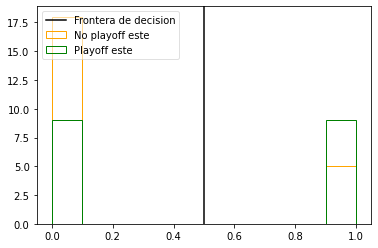

In [ ]:
lr_este_multi.predict_proba(X_este_tr).shape
plt.hist(lr_este_multi.predict(X_este_tr[y_este==0]),color='orange',histtype='step',label='No playoff este')
plt.hist(lr_este_multi.predict(X_este_tr[y_este==1]),color='green',histtype='step',label='Playoff este')
plt.axvline(x=0.5,color='black',label='Frontera de decision')
plt.legend(loc='upper left',framealpha=0.6)

Una alternativa es usar Principal Component analysis (PCA) para bajar de 12 a 2

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_este_pca=pca.fit_transform(X_este)
X_este_pca.shape

(41, 2)

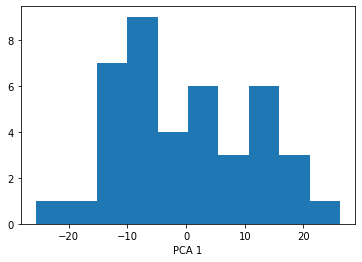

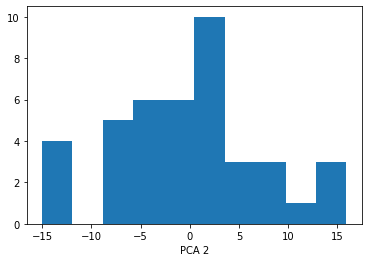

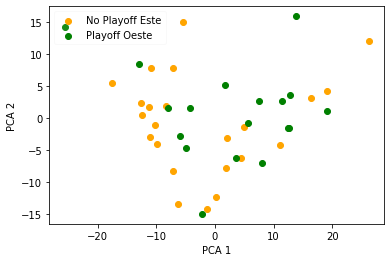

In [ ]:
plt.hist(X_este_pca[:,0],bins=10)
plt.xlabel(r'PCA 1')
plt.show()
plt.hist(X_este_pca[:,1],bins=10)
plt.xlabel(r'PCA 2')
plt.show()
plt.scatter(X_este_pca[y_este==0,0],X_este_pca[y_este==0,1], c='orange', label="No Playoff Este")
plt.scatter(X_este_pca[y_este==1,0],X_este_pca[y_este==1,1], c='green', label="Playoff Oeste")
plt.legend(loc='upper left',framealpha =0.1)
#plt.xlim(9.0,31.0)
#plt.ylim(15.0,35.0)
plt.xlabel(r'PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
lr_este_pca=LogisticRegression()
lr_este_pca.fit(X_este_pca,y_este)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'PCA 2')

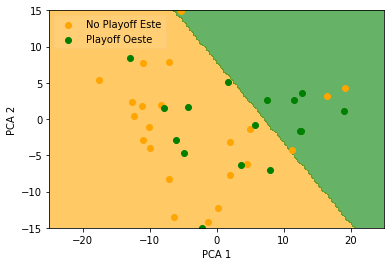

In [ ]:
x=np.linspace(-25.0,25.0,100)
y=np.linspace(-15.0,15.0,100)
Xtoplot,Ytoplot=np.meshgrid(x,y)
plt.xlim(-25.0,25.0)
plt.ylim(-15.0,15.0)
Z=lr_este_pca.predict(np.c_[Xtoplot.ravel(), Ytoplot.ravel()]).reshape(Xtoplot.shape)
plt.contourf(Xtoplot,Ytoplot,Z,levels=[0.0,0.5,1.0],colors=['orange','green'],alpha=0.6)
plt.scatter(X_este_pca[y_este==0,0],X_este_pca[y_este==0,1], c='orange', label="No Playoff Este")
plt.scatter(X_este_pca[y_este==1,0],X_este_pca[y_este==1,1], c='green', label="Playoff Oeste")
plt.legend(loc='upper left',framealpha =0.1)
plt.xlabel(r'PCA 1')
plt.ylabel('PCA 2')

In [ ]:
from sklearn.metrics import confusion_matrix
cf_este=confusion_matrix(y_este,lr_este_pca.predict(X_este_pca))
print(cf_este)
tn, fp, fn, tp = cf_este.ravel()
print("Sensitividad (TPR/Recall) :%8.3f" % (tp/(tp+fn)))
print("Especificidad:%8.3f" % (tn/(tn+fp)))
print("Precision:%8.3f" % (tp/(tp+fp)))
print("FPR :%8.3f" % (fp/(tn+fp)))

[[18  5]
 [11  7]]
Sensitividad (TPR/Recall) :   0.389
Especificidad:   0.783
Precision:   0.583
FPR :   0.217


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
print(lr_este_pca.predict(X_este_pca).min(),lr_este_pca.predict(X_este_pca).max())
decision=minmax.fit_transform(lr_este_pca.predict(X_este_pca).reshape(-1,1))
print(decision.min(),decision.max())

0 1
0.0 1.0


2 0


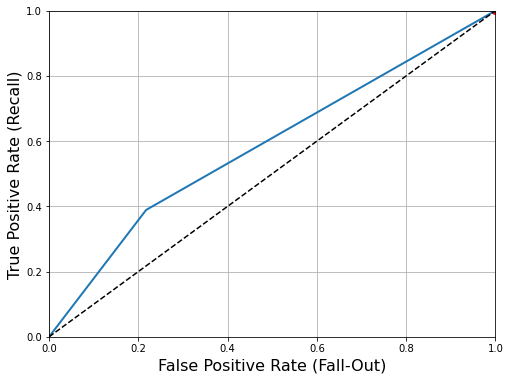

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_este, lr_este_pca.predict(X_este_pca))
print(thresholds[0],thresholds[-1])
plt.figure(figsize=(8, 6))                         # Not shown
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])
plt.scatter(fpr[np.argmin(np.abs(thresholds-0.0))],tpr[np.argmin(np.abs(thresholds-0.0))],color='red')                                    # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
plt.grid(True)                                            # Not shown
plt.show()